# Histogramas
Son gráficos que indican cuantos elementos hay de cada valor. En el caso de imágenes, nos da una información de como se distribuyen los claro oscuros de la escena, agrupando por luminosidad (contraste!)

Dos imágenes pueden tener el mismo histograma

In [2]:
myPath = ''

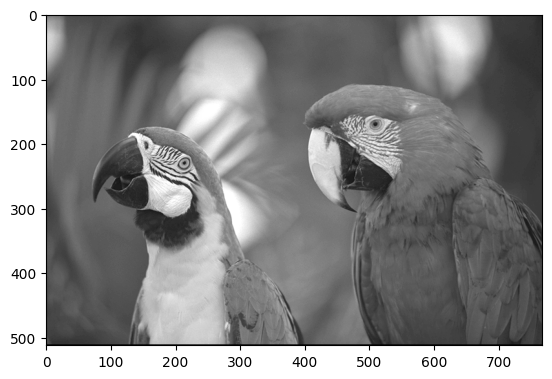

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(myPath+'img/kodim23.png',0)
plt.imshow(img, cmap='gray')

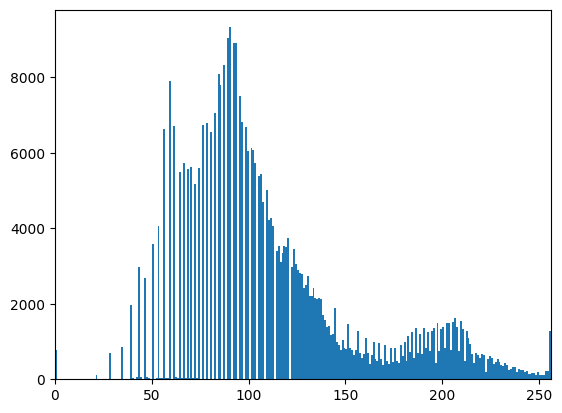

In [5]:
plt.hist(img.ravel(),256,[0,256])
plt.xlim([0,256])
plt.show()

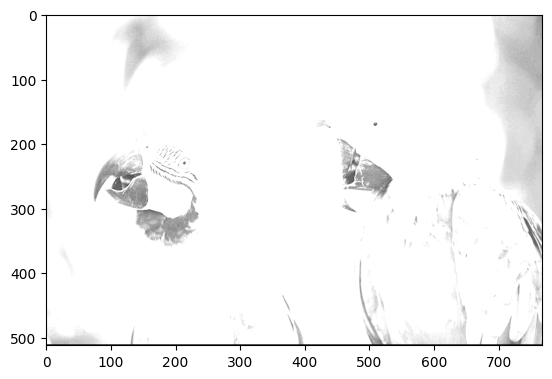

In [6]:
ret,thresh_trunc = cv2.threshold(img,70,255,cv2.THRESH_TRUNC)
plt.imshow(thresh_trunc, cmap='gray')

Qué pasa con el histograma de una imágenes con threshold truncado?

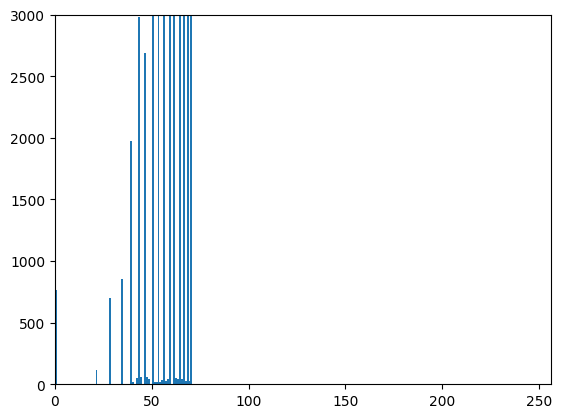

In [7]:
plt.hist(thresh_trunc.ravel(),256,[0,256])
plt.xlim([0,256])
plt.ylim([0,3000])
plt.show()

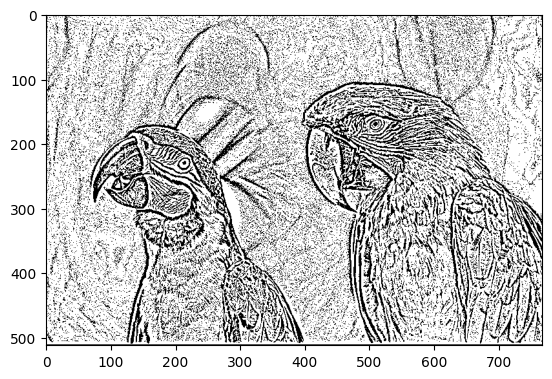

In [8]:
#Python: cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) → dst
# C constantsubtracted from the mean or weighted mean
thresh_adap = cv2.adaptiveThreshold(img,150,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
plt.imshow(thresh_adap, cmap='gray')

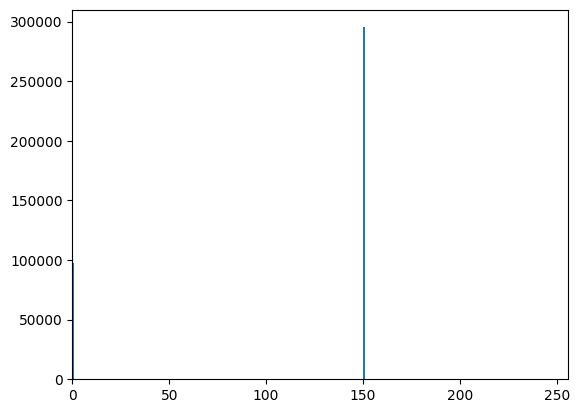

In [9]:
plt.hist(thresh_adap.ravel(),256,[0,256])
plt.xlim([0,256])
#plt.ylim([0,3000])
plt.show()

## Contraste

Qué pasa si tenemos una imagen con mal contraste?

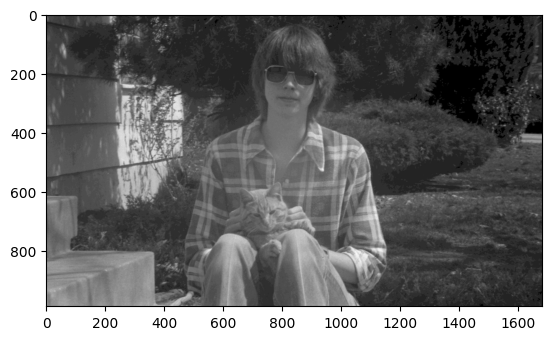

In [10]:
bc = cv2.imread('img/bad-cont.jpg',0)
plt.imshow(bc, cmap='gray')

# Función de distribución acumulada (CDF)

Es una herramienta que ayuda a entender entre qué valores de pixeles está practicamente toda la información de la escena


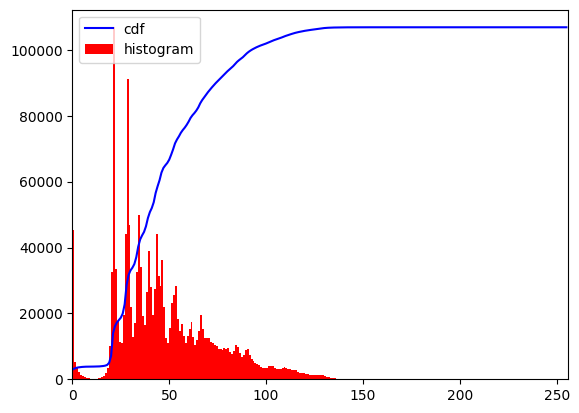

In [11]:
hist,bins = np.histogram(bc.ravel(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ (cdf.max())

plt.plot(cdf_normalized, color = 'b')
plt.hist(bc.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Ecualización de histogramas, buscando estirar de forma lineal el gráfico anterior.

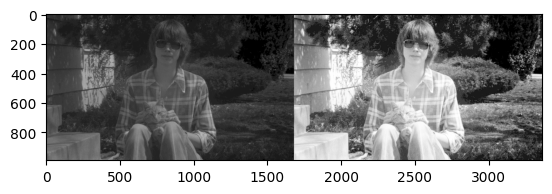

In [12]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*200/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
bc2 = cdf[bc]
res = np.hstack((bc,bc2)) #stacking images side-by-side
plt.imshow(res, cmap='gray')

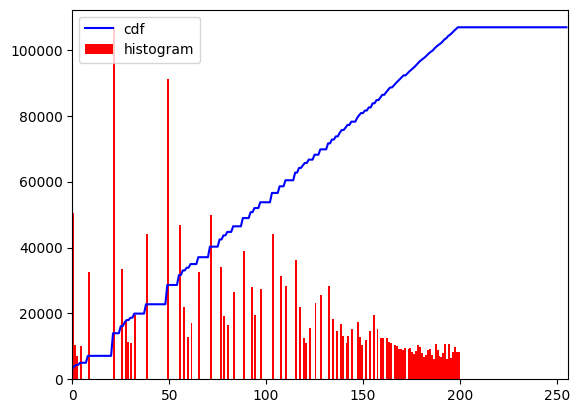

In [13]:
hist,bins = np.histogram(bc2.ravel(),256,[0,256])

cdf2 = hist.cumsum()
cdf_normalized2 = cdf2 * hist.max()/ (cdf2.max())

plt.plot(cdf_normalized2, color = 'b')
plt.hist(bc2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

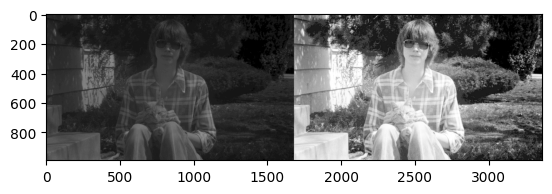

In [14]:
equ = cv2.equalizeHist(bc)
res2 = np.hstack((bc,equ)) #stacking images side-by-side
plt.imshow(res2, cmap='gray')

# Contrast Limited Adaptive Histogram Equalization

Divide la escena en partes mas pequeñas y ecualiza cada una. Esto es una forma mas efectiva de ecualizar el histograma, ya que en cada fracción de la escena uno puede observar una distribución de luz mas homogenea.

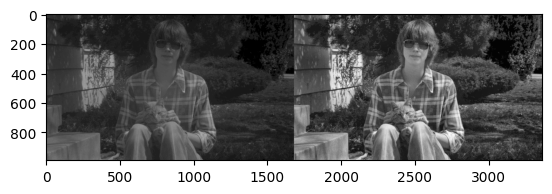

In [15]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(bc)
res3 = np.hstack((bc,cl1)) #stacking images side-by-side
plt.imshow(res3, cmap='gray')

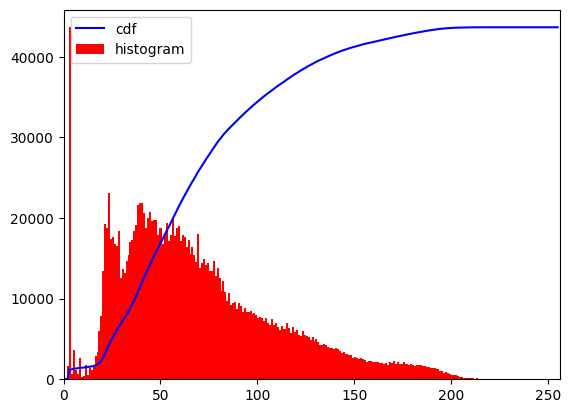

In [16]:
hist,bins = np.histogram(cl1.ravel(),256,[0,256])

cdf3 = hist.cumsum()
cdf_normalized3 = cdf3 * hist.max()/ (cdf3.max())

plt.plot(cdf_normalized3, color = 'b')
plt.hist(cl1.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()